In [10]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Conv2D(200, (3, 3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

d:\Live-Safety-Helmet-Detection-by-Using-Python-main\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

In [13]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history = model.fit(train_data, train_target, epochs=20, callbacks=[checkpoint], validation_split=0.2)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 820ms/step - accuracy: 0.5302 - loss: 1.0243 - val_accuracy: 0.6429 - val_loss: 0.7029
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 690ms/step - accuracy: 0.6568 - loss: 0.6458 - val_accuracy: 0.8036 - val_loss: 0.5142
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 705ms/step - accuracy: 0.7636 - loss: 0.4800 - val_accuracy: 0.9107 - val_loss: 0.2787
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 681ms/step - accuracy: 0.8350 - loss: 0.3594 - val_accuracy: 0.9286 - val_loss: 0.3916
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 676ms/step - accuracy: 0.8671 - loss: 0.3416 - val_accuracy: 0.8036 - val_loss: 0.3510
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 716ms/step - accuracy: 0.8427 - loss: 0.3764 - val_accuracy: 0.8929 - val_loss: 0.2122
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 701ms/step - accuracy: 0.9205 - loss: 0.2036 - val_accuracy: 0.9286 - val_loss: 0.2301
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 708ms/step - accuracy: 0.9535 - loss: 0.1553 - val_accuracy: 0.9464 - val_loss:

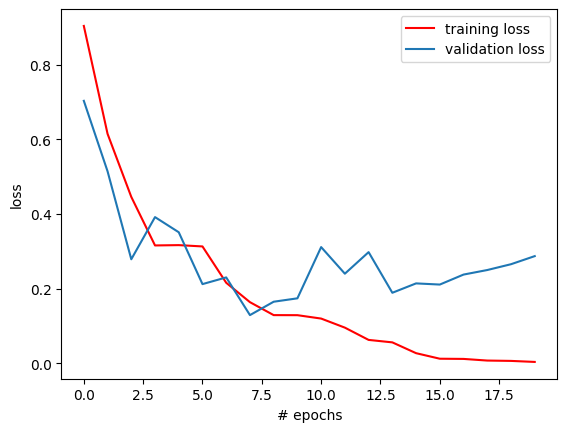

In [14]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

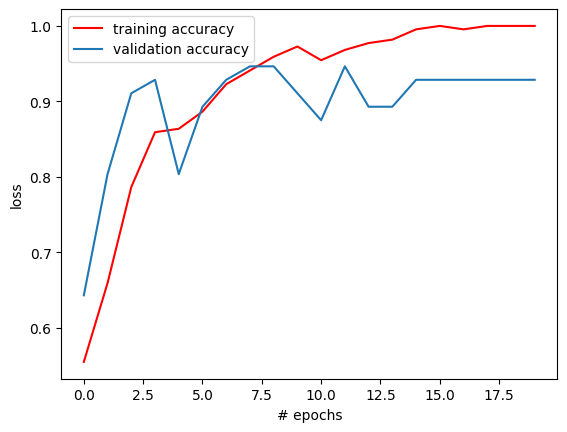

In [15]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
print(model.evaluate(test_data,test_target))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.8710 - loss: 0.4585
[0.45847755670547485, 0.8709677457809448]
